<a href="https://colab.research.google.com/github/donkimc/Instacart_capstone/blob/master/instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library
##others
---
> pandas, seaborn and matplot

**bold** *single aterisk* ~~two tildes~~ `mono space`
$y= 0.1*x$
>> 1. one 
1. two 
1. three

* one
* two 
* three




In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
aisles = pd.read_csv('/content/drive/My Drive/data/instacart/aisles.csv')
departments = pd.read_csv('/content/drive/My Drive/data/instacart/departments.csv')
order_products_prior = pd.read_csv('/content/drive/My Drive/data/instacart/order_products__prior.csv')
order_products_train = pd.read_csv('/content/drive/My Drive/data/instacart/order_products__train.csv')
orders = pd.read_csv('/content/drive/My Drive/data/instacart/orders.csv')
products = pd.read_csv('/content/drive/My Drive/data/instacart/products.csv')
df_list = []
df_list.append(aisles)
df_list.append(departments)
df_list.append(order_products_prior)
df_list.append(order_products_train)
df_list.append(orders)
df_list.append(products)

In [0]:
print(order_products_prior.describe())
print(order_products_prior.add_to_cart_order.median())
print(order_products_prior.add_to_cart_order.mode())

           order_id    product_id  add_to_cart_order     reordered
count  3.243449e+07  3.243449e+07       3.243449e+07  3.243449e+07
mean   1.710749e+06  2.557634e+04       8.351076e+00  5.896975e-01
std    9.873007e+05  1.409669e+04       7.126671e+00  4.918886e-01
min    2.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.559430e+05  1.353000e+04       3.000000e+00  0.000000e+00
50%    1.711048e+06  2.525600e+04       6.000000e+00  1.000000e+00
75%    2.565514e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421083e+06  4.968800e+04       1.450000e+02  1.000000e+00
6.0
0    1
dtype: int64


In [0]:
orders.describe()
orders.mode()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,210.0,prior,1.0,0.0,10.0,30.0
1,2,310.0,NaN,2.0,NaN,NaN,NaN
2,3,313.0,NaN,3.0,NaN,NaN,NaN
3,4,690.0,NaN,4.0,NaN,NaN,NaN
4,5,786.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3421078,3421079,NaN,NaN,NaN,NaN,NaN,NaN
3421079,3421080,NaN,NaN,NaN,NaN,NaN,NaN
3421080,3421081,NaN,NaN,NaN,NaN,NaN,NaN
3421081,3421082,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
for l in df_list:
  print(l.info())
  print(l.shape)
  print(' - NaN in dataset - ')
  print(l.isnull().sum())
  print('')
m=np.max(orders.days_since_prior_order) # median gives nan, replace with max
#orders.fillna(value={"days_since_prior_order":m},inplace=True)
orders.days_since_prior_order.dropna(axis=0, how='any',inplace=True)
orders['days_since_prior_order'] = orders.days_since_prior_order.astype(int)
#orders.days_since_prior_order.dropna(inplace=True)
#orders.days_since_prior_order.replace(30,0)

print(orders.order_hour_of_day.unique())
print(orders.order_dow.unique())
print(orders.days_since_prior_order.unique())


# must do outlier screening



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
(134, 2)
 - NaN in dataset - 
aisle_id    0
aisle       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
(21, 2)
 - NaN in dataset - 
department_id    0
department       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int6

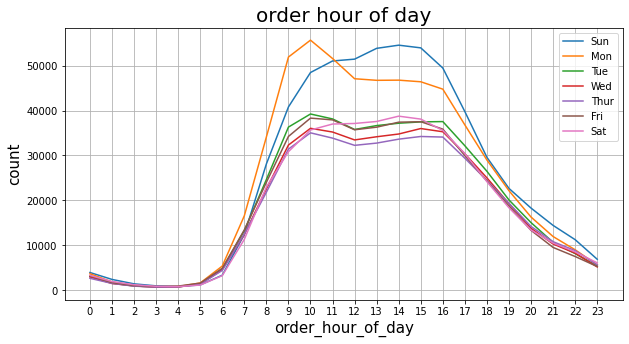

In [0]:
#
path='/content/drive/My Drive/'
plt.figure(figsize=(10,5))
for i in range(0,7):
  orders[orders['order_dow']==i].groupby('order_hour_of_day').size().plot()
plt.legend(['Sun','Mon','Tue','Wed','Thur','Fri','Sat'])
plt.title('order hour of day', fontsize= 20)
plt.xlabel('order_hour_of_day', fontsize= 15) 
plt.ylabel('count', fontsize= 15)
plt.xticks(range(0,24))
plt.grid()
#plt.savefig(path+'.png')
plt.show()

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text major ticklabel objects>)

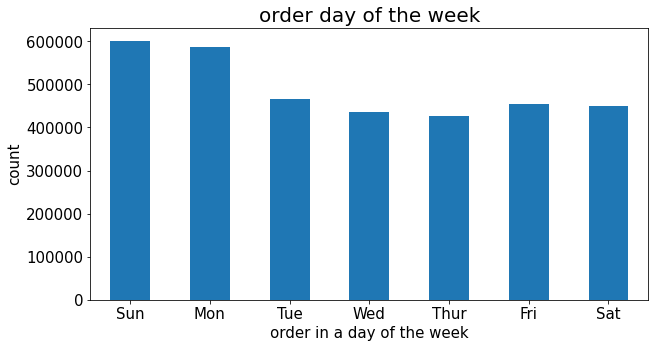

In [0]:
plt.figure(figsize=(10,5))
orders.groupby('order_dow').size().plot(kind="bar")
plt.title('order day of the week',fontsize=20)
plt.xlabel('order in a day of the week',fontsize=15) 
plt.ylabel('count',fontsize=15)
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],rotation=0,fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig(path+'.png')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

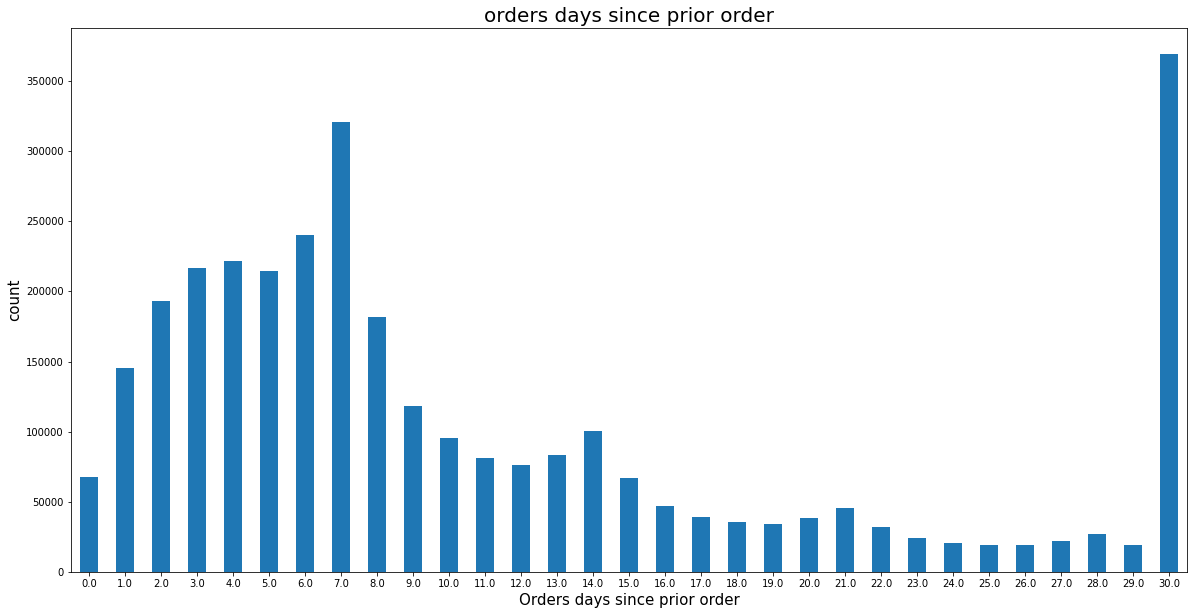

In [0]:
plt.figure(figsize=(20,10))
orders.groupby('days_since_prior_order').size().plot(kind="bar")
plt.title('orders days since prior order', fontsize=20)
plt.xlabel('Orders days since prior order', fontsize=15)
plt.ylabel('count',fontsize =15)
plt.xticks(rotation=0)



In [0]:
new_train = pd.merge(order_products_train, products, on='product_id')
new_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


TypeError: ignored

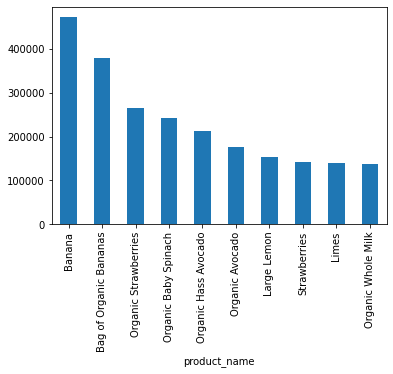

In [0]:
#df = pd.DataFrame({'Product_ID':order_products_train.product_id.unique()})
#df.groupby('Product_ID').count()
#df
#order_products_train.product_id.value_counts()
#c = products[products.product_id.isin(df.index)].product_name
# merge https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
new_train = pd.merge(order_products_prior, products, on='product_id')
df = new_train.groupby('product_name').size().to_frame('size')
df2 = df.sort_values(by='size', ascending=False).head(10)
p = df2.plot.bar()
p.legend().remove()
p.title('Top 10 selling products')

1    0.589697
0    0.410303
Name: reordered, dtype: float64


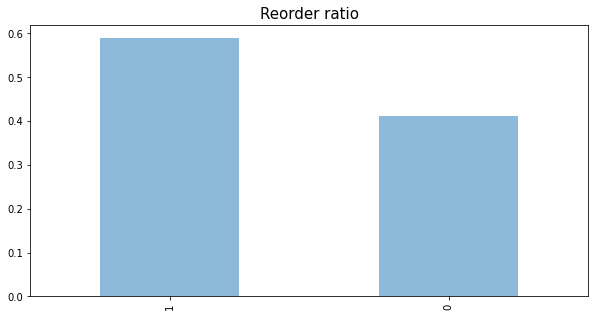

In [0]:
plt.figure(figsize=(10,5))
order_products_train.head()
#df.plot.bar( y='size', rot =0)
order_products_prior.reordered.value_counts(normalize=True).plot(kind="bar",alpha =0.5)
plt.title('Reorder ratio',fontsize=15)
print(order_products_prior.reordered.value_counts(normalize=True))

          size
order_id      
2            9
3            8
4           13
5           26
6            3
               size
count  3.214874e+06
mean   1.008888e+01
std    7.525398e+00
min    1.000000e+00
25%    5.000000e+00
50%    8.000000e+00
75%    1.400000e+01
max    1.450000e+02
median  size    8.0
dtype: float64
max size    145
dtype: int64


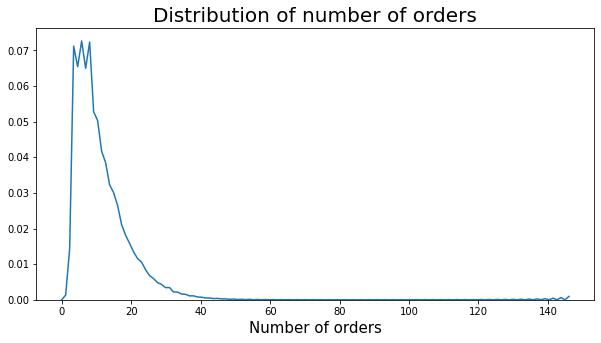

In [0]:

df = order_products_prior.groupby('order_id').size().to_frame('size')
#df2 = df.sort_values(by='size', ascending=False).head(30)
#df2.plot.bar()
#print(df2)
#order_products_train.order_id.value_counts().plot(kind="bar",alpha =0.5)
#order_products_train.order_id.value_counts(
plt.figure(figsize=(10,5))
print(df.head())
sns.distplot(df,hist=False)
plt.title('Distribution of number of orders', fontsize =20)
plt.xlabel('Number of orders', fontsize =15)
print(df.describe())
print('median ',df.median())
print('max', df.max())


Text(0.5, 0, 'Order numbers')

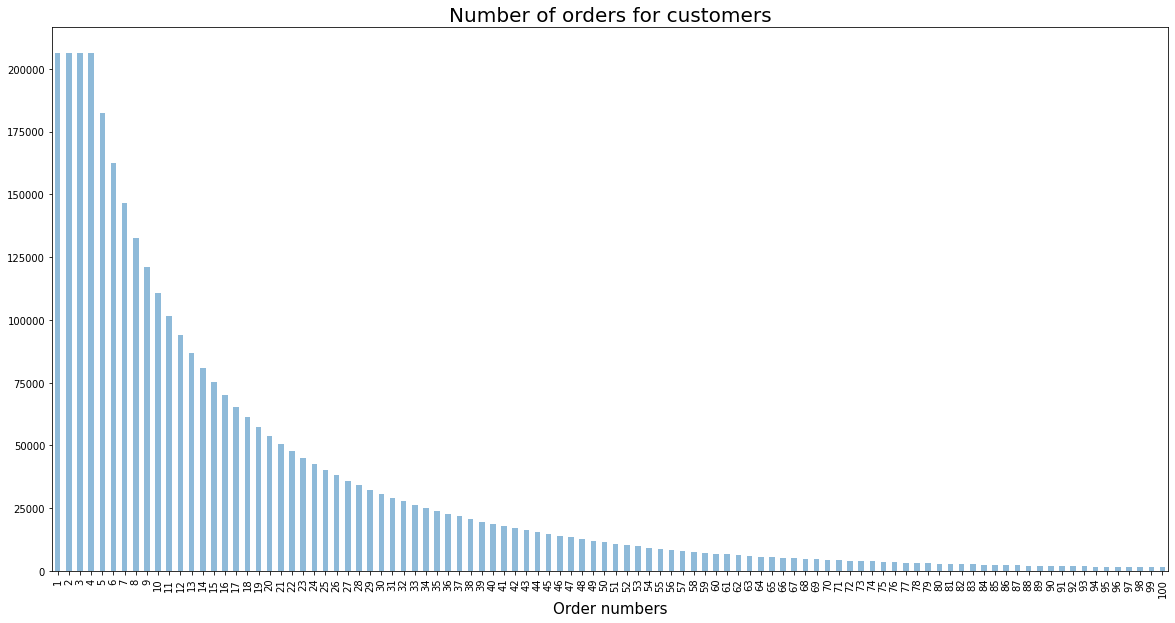

In [0]:
plt.figure(figsize=(20,10))
orders.order_number.value_counts(normalize=False).plot(kind="bar",alpha =0.5)

plt.title('Number of orders for customers',fontsize=20)
plt.xlabel('Order numbers',fontsize=15)
# It shows that cusotmer orders at least 3 times and more.

,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_size
order_number,1.000000,0.015157,-0.035910,-0.360495,-0.002118
order_dow,0.015157,1.000000,0.006082,-0.028409,-0.025404
order_hour_of_day,-0.035910,0.006082,1.000000,0.000863,-0.005596
days_since_prior_order,-0.360495,-0.028409,0.000863,1.000000,0.057544
order_size,-0.002118,-0.025404,-0.005596,0.057544,1.000000


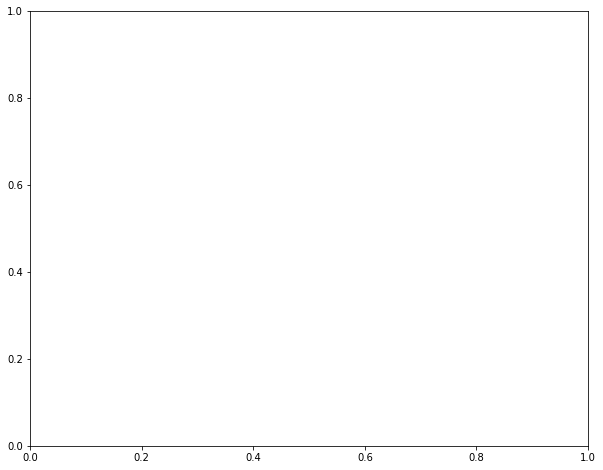

In [0]:
orders.head()
order_products = order_products_prior.append(order_products_train)
order_size = order_products.groupby('order_id').size().to_frame('order_size')
new_orders = pd.merge(orders, order_size, on='order_id')
new_orders.head()
new_orders.drop(columns=['order_id','user_id'],inplace=True)
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = new_orders.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
corr.style.background_gradient(cmap='coolwarm')



In [0]:
new_prior = pd.merge(order_products_prior, departments, on='product_id')

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


([<matplotlib.patches.Wedge at 0x7fce6cbbeba8>,
 [Text(0.6680107956168982, 0.8739345381315918, 'produce'),
  Text(-0.7813301447473172, 0.7742888381664407, 'dairy eggs'),
  Text(-1.0997036040614931, -0.02553396197543709, 'snacks'),
  Text(-0.929949414726075, -0.5875322000117363, 'beverages'),
  Text(-0.5562240525522752, -0.949007272555023, 'frozen'),
  Text(-0.14462287136854038, -1.0904513859302114, 'pantry'),
  Text(0.1793685920345326, -1.0852773416005466, 'bakery'),
  Text(0.4092672835885109, -1.021029035132734, 'canned goods'),
  Text(0.608797850748236, -0.916168749152867, 'deli'),
  Text(0.7675383742555044, -0.7879624636016728, 'dry goods pasta'),
  Text(0.8803045342869532, -0.6595937590015772, 'household'),
  Text(0.9638794655266397, -0.5300343158099101, 'breakfast'),
  Text(1.0273913179752587, -0.3930230015521494, 'meat seafood'),
  Text(1.0648739543951256, -0.2757597890390983, 'personal care'),
  Text(1.0843221007029922, -0.18505561846928756, 'babies'),
  Text(1.0942931529637745,

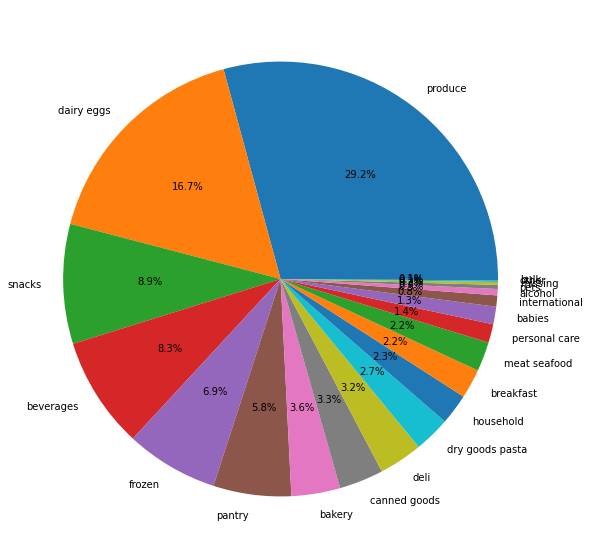

In [0]:
p_df=pd.merge(products,departments,on='department_id')
p_df=pd.merge(p_df,aisles, on ='aisle_id')
o_df=pd.merge(p_df,order_products_prior,on = 'product_id')
#o_df.head()
plt.figure(figsize=(20,10))
result = o_df['department'].value_counts(normalize=True)
plt.pie(result,labels=result.index, autopct='%1.1f%%')

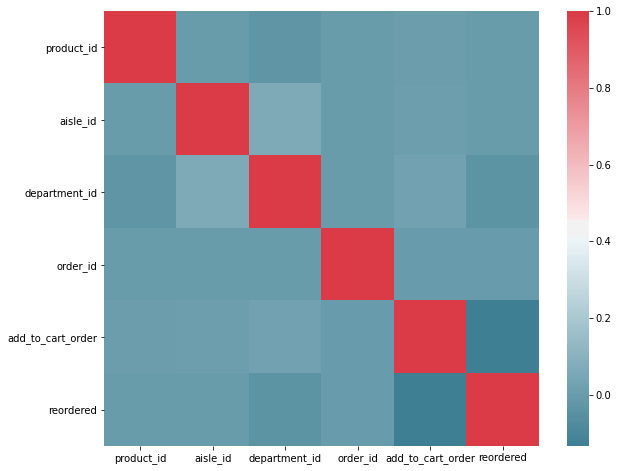

In [0]:
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = o_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
#corr.style.background_gradient(cmap='coolwarm')